In [41]:
#imports

import os
import numpy as np
from tensorflow.keras import layers, models


In [42]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(85, activation='relu'))
model.add(layers.Dense(42, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 85)             │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 42)             │         3,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 11)             │           242 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,306 (75.41 KB)

 Trainable params: 19,306 (75.41 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
'''
Layer 0 is conv => 2 arrays => 3x3x1 and 1 bias
Layer 3 is dense => 2 arrays => 169x85 and 85 bias
so on..
'''
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeights"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [44]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to InitWeights\layer_number_0.npz
Layer 1 has no weights to save.
Layer 2 has no weights to save.
Saved parameters for layer 3 to InitWeights\layer_number_3.npz
Saved parameters for layer 4 to InitWeights\layer_number_4.npz
Saved parameters for layer 5 to InitWeights\layer_number_5.npz
Saved parameters for layer 6 to InitWeights\layer_number_6.npz
Saved parameters for layer 7 to InitWeights\layer_number_7.npz
Saved parameters for layer 8 to InitWeights\layer_number_8.npz
Saved parameters for layer 9 to InitWeights\layer_number_9.npz
Saved parameters for layer 10 to InitWeights\layer_number_10.npz


In [45]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} weights: {weights}")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 weights: [array([[[[-0.5617868 ]],

        [[-0.41561568]],

        [[-0.05746228]]],


       [[[-0.57496256]],

        [[-0.5666689 ]],

        [[-0.1672917 ]]],


       [[[ 0.5559573 ]],

        [[-0.5255187 ]],

        [[ 0.53385055]]]], dtype=float32), array([0.], dtype=float32)]
Layer 1 has no weights.
Layer 2 has no weights.
Layer 3 weights: [array([[ 0.00998771, -0.08998093, -0.10398449, ..., -0.12517218,
         0.09706804,  0.13472965],
       [-0.10875809,  0.09961557,  0.10365775, ...,  0.00660066,
         0.03016444, -0.06133325],
       [-0.00233042,  0.0416611 ,  0.12080035, ..., -0.07672102,
        -0.09563981,  0.00741385],
       ...,
       [-0.03378333,  0.00504804, -0.06772954, ...,  0.12386283,
        -0.11230326,  0.13172752],
       [-0.10055874, -0.11762191,  0.1386523 , ...,  0.07459506,
         0.13711783,  0.14207032],
       [-0.03424808, -0.08651785,  0.15209433, ...,  0.06152335,
        -0.10454499,  0.06481634]], dtype=float32), arra

In [46]:
x=model.get_weights()[16]
print((x))

[[ 1.1842161]
 [-1.1733156]]


In [47]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot kernel
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

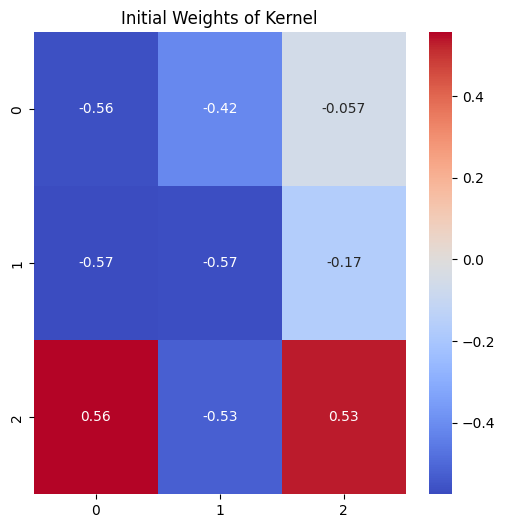

In [48]:
# After training, extract and plot the kernel weights
final_kernel = model.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Initial Weights of Kernel')